# COVID-19 Data Analysis Project


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
covid_confirmed = pd.read_csv("covid19_Confirmed_dataset.csv")
covid_deaths = pd.read_csv("covid19_deaths_dataset.csv")
happiness = pd.read_csv("worldwide_happiness_report.csv")

In [37]:
print(covid_confirmed.head())
print(covid_deaths.head())
print(happiness.head())
covid_confirmed.info()
covid_deaths.info()
happiness.info()

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0     1463     1531   

In [38]:
covid_confirmed_grouped = covid_confirmed.groupby("Country/Region").sum().drop(columns=["Lat", "Long"])
covid_deaths_grouped = covid_deaths.groupby("Country/Region").sum().drop(columns=["Lat", "Long"])
latest_confirmed = covid_confirmed_grouped.iloc[:, -1].reset_index().rename(columns={covid_confirmed_grouped.columns[-1]: "Confirmed"})
latest_deaths = covid_deaths_grouped.iloc[:, -1].reset_index().rename(columns={covid_deaths_grouped.columns[-1]: "Deaths"})
covid_summary = pd.merge(latest_confirmed, latest_deaths, on="Country/Region")

In [39]:
print("Happiness columns:", happiness.columns.tolist())
print("COVID summary columns:", covid_summary.columns.tolist())

Happiness columns: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
COVID summary columns: ['Country/Region', 'Confirmed', 'Deaths']


In [40]:
happiness.rename(columns={"Country or region": "Country"}, inplace=True)
covid_summary.rename(columns={"Country/Region": "Country"}, inplace=True)

In [41]:
happiness.columns = happiness.columns.str.strip()
covid_summary.columns = covid_summary.columns.str.strip()


In [42]:
combined_df = pd.merge(happiness, covid_summary, on="Country", how="inner")
combined_df.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Confirmed,Deaths
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,4995,211
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,9356,452
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7738,210
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1797,10
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,39512,4811


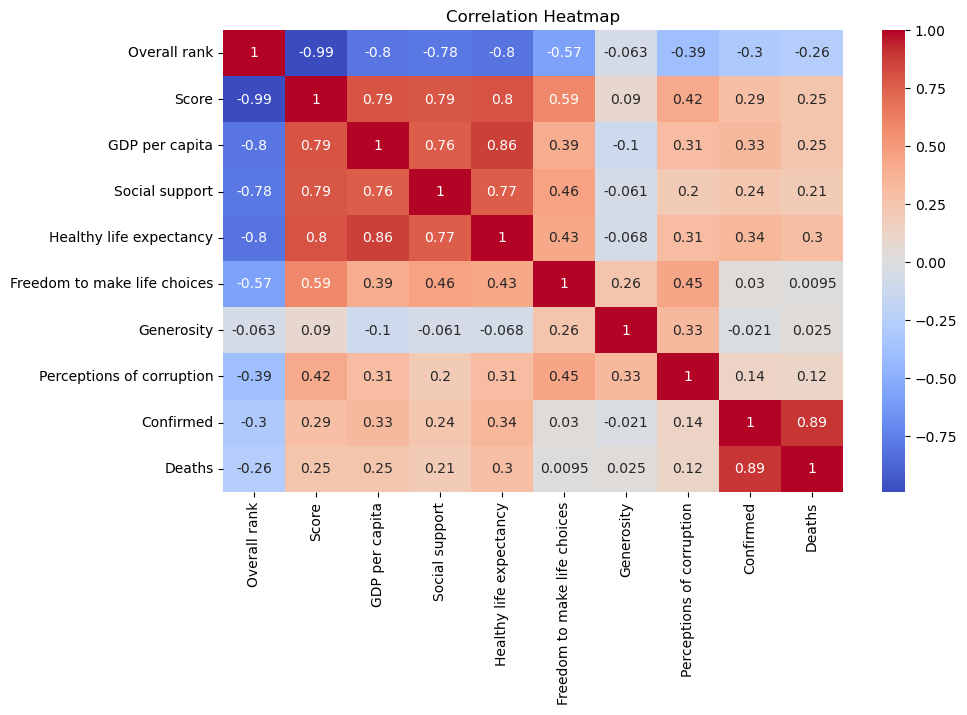

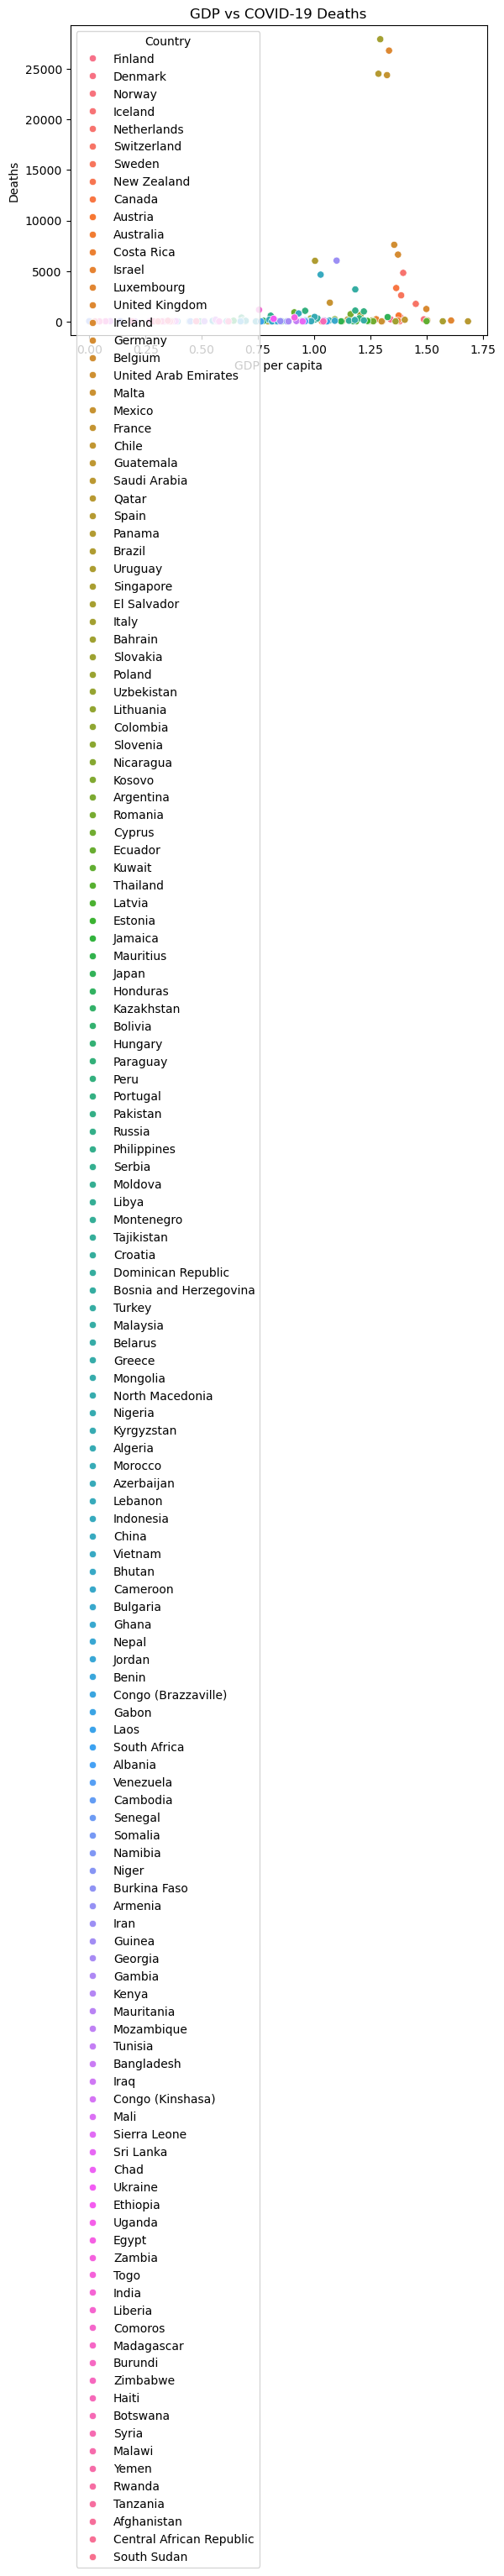

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
sns.scatterplot(data=combined_df, x="GDP per capita", y="Deaths", hue="Country")
plt.title("GDP vs COVID-19 Deaths")
plt.show()
